In [1]:
import gseapy as gp
import numpy as np

from pathlib import Path
import pandas as pd

from matplotlib import rcParams
import matplotlib.pyplot as plt

rcParams["pdf.fonttype"] = 42

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

DPI = 300
FONTSIZE = 20  # 42

In [2]:
SAMPLE_NAME =  "concat_withWu2022" #"concat_withWu2022" #"Wu2022_ST_LM4" # precise which one you want to do the gene enrrichment analysis on (maybe try concat as well)

In [3]:
DIR2SAVE = Path("/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/concat_withWu2022/microenvs_geneexp")

In [4]:
# figures
FIG2SAVE = DIR2SAVE.joinpath("figures/")
FIG2SAVE.mkdir(parents=True, exist_ok=True)

In [6]:
genes_df = pd.read_excel(
    DIR2SAVE.joinpath(f"{SAMPLE_NAME}_DE_microenvs.xlsx"), 
    header=0,
)

In [7]:
genes_df

,0,1,2,3,4,5,6,7,8,9
0,SULF1,ALB,IGLC1,ECRG4,MCOLN3,KRT17,ALB,CLC,RIIAD1,ALB
1,RETN,APOA1,IGKC,FBLN1,B3GALT2,MMP7,SERPINA1,GABRA2,GAL,APOC3
2,COL11A1,SERPINA1,IGLC2,MUSTN1,ASB4,SPP1,APOA1,CEACAM7,SMIM32,FGB
3,COL1A2,FGA,CXCL13,F13A1,LRRN3,C2CD4A,HAMP,LINC01559,UBE2T,APOA1
4,COL1A1,APOC3,IGHG3,SNCG,AC007493.1,DMBT1,SAA1,MIR210HG,CENPW,FGA
...,...,...,...,...,...,...,...,...,...,...
295,CXCR4,AS3MT,KCNH6,TUBB6,AC132192.2,PCDH1,CALU,PTPRN2,BUB1B,CYP4F3
296,FZD2,PLA2G5,DKK1,GNG11,FRMD1,TAP1,EIF3H,FUT3,FANCD2,KDM8
297,LBH,ASS1,NLRC5,PLVAP,COLCA1,RHPN1,AC007952.4,HOXB-AS3,TRAIP,ABCB4
298,WIPF1,OSMR,COL28A1,FOS,AL050341.2,ASIC1,HSP90AA1,ITPKA,CEP72,ACOX2


### run enrichment analysis

In [8]:
geneset2use = ["MSigDB_Hallmark_2020", "KEGG_2021_Human"] #"MSigDB_Hallmark_2020" # KEGG_2021_Human, GO_Biological_Process_2021, Reactome_2022

In [11]:
enr_dict = dict()

for i in genes_df.columns:
    #table2look = svg_byregion[svg_byregion.segmentation_label==i].sort_values(ascending=True, by="padj", axis=0)
    #gene2look = table2look.gene[:300]
    gene2look = genes_df[i].dropna() #.values.tolist()
    
    enr = gp.enrichr(gene_list=gene2look, 
                     gene_sets=geneset2use, 
                     organism="Human",
                     outdir=None,
                     #cutoff=0.05,
                    )
    enr_dict[i] = enr.results

In [12]:
with pd.ExcelWriter(DIR2SAVE.joinpath(f'{SAMPLE_NAME}_DE_microenvs_gsea.xlsx')) as writer:  
    for cluster in list(enr_dict.keys()):      
        enr_dict[cluster].to_excel(writer, sheet_name=f"region_{cluster}")

In [13]:
DIR2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/concat_withWu2022/microenvs_geneexp')

In [14]:
enr_dict

{'0':                  Gene_set                               Term Overlap  \
 0    MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  72/200   
 1    MSigDB_Hallmark_2020                  KRAS Signaling Up  21/200   
 2    MSigDB_Hallmark_2020                         Myogenesis  20/200   
 3    MSigDB_Hallmark_2020              Inflammatory Response  20/200   
 4    MSigDB_Hallmark_2020                       Angiogenesis   10/36   
 ..                    ...                                ...     ...   
 248       KEGG_2021_Human                      Thermogenesis   1/232   
 249       KEGG_2021_Human      Pathways of neurodegeneration   3/475   
 250       KEGG_2021_Human                  Alzheimer disease   2/369   
 251       KEGG_2021_Human             Olfactory transduction   2/440   
 252       KEGG_2021_Human      Amyotrophic lateral sclerosis   1/364   
 
           P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
 0    3.826820e-81      1.492460e-79      

In [15]:
# reload excel file 
#enr_dict = dict()
enr_dict = pd.read_excel(DIR2SAVE.joinpath(f'{SAMPLE_NAME}_DE_microenvs_gsea.xls'),
                         sheet_name=None,
                         index_col=0
                         
                        )

In [16]:
enr_dict

{'region_0':                  Gene_set                               Term Overlap  \
 0    MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  72/200   
 1    MSigDB_Hallmark_2020                  KRAS Signaling Up  21/200   
 2    MSigDB_Hallmark_2020                         Myogenesis  20/200   
 3    MSigDB_Hallmark_2020              Inflammatory Response  20/200   
 4    MSigDB_Hallmark_2020                       Angiogenesis   10/36   
 ..                    ...                                ...     ...   
 248       KEGG_2021_Human                      Thermogenesis   1/232   
 249       KEGG_2021_Human      Pathways of neurodegeneration   3/475   
 250       KEGG_2021_Human                  Alzheimer disease   2/369   
 251       KEGG_2021_Human             Olfactory transduction   2/440   
 252       KEGG_2021_Human      Amyotrophic lateral sclerosis   1/364   
 
           P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
 0    3.826820e-81      1.492460e-7

In [17]:
enr_dict.items()

dict_items([('region_0',                  Gene_set                               Term Overlap  \
0    MSigDB_Hallmark_2020  Epithelial Mesenchymal Transition  72/200   
1    MSigDB_Hallmark_2020                  KRAS Signaling Up  21/200   
2    MSigDB_Hallmark_2020                         Myogenesis  20/200   
3    MSigDB_Hallmark_2020              Inflammatory Response  20/200   
4    MSigDB_Hallmark_2020                       Angiogenesis   10/36   
..                    ...                                ...     ...   
248       KEGG_2021_Human                      Thermogenesis   1/232   
249       KEGG_2021_Human      Pathways of neurodegeneration   3/475   
250       KEGG_2021_Human                  Alzheimer disease   2/369   
251       KEGG_2021_Human             Olfactory transduction   2/440   
252       KEGG_2021_Human      Amyotrophic lateral sclerosis   1/364   

          P-value  Adjusted P-value  Old P-value  Old Adjusted P-value  \
0    3.826820e-81      1.492460e-79 

In [18]:
# just so we get keys as str 'nb' for the cellular neighbourhood
enr_dict = {k.split("_")[1]:v for k,v in enr_dict.items()}

### plotting

### get dictionary of GO results: each key is region. And transform p values -log10scale to get positive values

In [19]:
-np.log10(enr_dict["0"][["Term","Adjusted P-value"]]["Adjusted P-value"])

0      78.826097
1      10.222846
2       9.610343
3       9.610343
4       9.156600
         ...    
248     0.006542
249     0.006542
250     0.006542
251     0.002082
252     0.001689
Name: Adjusted P-value, Length: 253, dtype: float64

In [20]:
## Create dictionary of GO results for each Cell_subtype
### -1 * log10 results - na become 0.0 when sum later
pvalues = dict()

for i in enr_dict.keys():
    enr_dict[i].drop_duplicates(subset="Term", inplace=True)
    pvalues[i] = enr_dict[i][["Term","Adjusted P-value"]]
    pvalues[i] = pvalues[i].rename(columns={'Adjusted P-value': i})
    pvalues[i] = pvalues[i].set_index("Term")
    pvalues[i][i] = -np.log10(pvalues[i][i])
    print(pvalues[i].shape)



(252, 1)
(257, 1)
(235, 1)
(260, 1)
(185, 1)
(272, 1)
(298, 1)
(219, 1)
(182, 1)
(262, 1)


### concat dataframes into single df and fill missing values with 0 

In [21]:
# cooncat pvalues to get a single dataframe with pathways + pvalues
minuslogp = pd.concat(pvalues.values(), join="outer", axis=1)
minuslogp.fillna(0, inplace=True)
minuslogp.shape

(363, 10)

In [22]:
minuslogp

,0,1,2,3,4,5,6,7,8,9
Term,,,,,,,,,,
Epithelial Mesenchymal Transition,78.826097,0.831933,0.021333,33.675835,0.021333,13.041433,33.616521,1.022821,0.000000,0.952826
KRAS Signaling Up,10.222846,2.363008,2.398723,6.290278,0.230860,3.631874,1.304966,3.296082,0.021333,3.597112
Myogenesis,9.610343,1.940879,0.021333,10.201127,0.021333,2.590609,6.486237,1.022821,0.021333,2.064296
Inflammatory Response,9.610343,1.117197,6.137145,1.431106,0.000000,4.870708,0.657476,0.777186,0.021333,0.952826
Angiogenesis,9.156600,1.293411,0.000000,3.110518,0.230860,5.083927,10.614604,0.745646,0.000000,1.445179
...,...,...,...,...,...,...,...,...,...,...
Ubiquinone and other terpenoid-quinone biosynthesis,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045946,0.000000
Non-homologous end-joining,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031341,0.000000
Protein export,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008461,0.000000


### select pathways that are statistically significant

In [23]:
# Test for significance at FDR < 0.05
minuslogp_bool = minuslogp <= -1 * np.log10(0.05)
# remove pathways that are not significant in both regions
# return True if all values in row are not significant, need to invert this later
minuslogp_bool = minuslogp_bool.all(axis=1) #.all() returns True if all items in list are True

In [24]:
minuslogp_bool

Term
Epithelial Mesenchymal Transition                      False
KRAS Signaling Up                                      False
Myogenesis                                             False
Inflammatory Response                                  False
Angiogenesis                                           False
                                                       ...  
Ubiquinone and other terpenoid-quinone biosynthesis     True
Non-homologous end-joining                              True
Protein export                                          True
RNA polymerase                                          True
D-Glutamine and D-glutamate metabolism                  True
Length: 363, dtype: bool

In [25]:
minuslogp[~minuslogp_bool].shape

(189, 10)

In [26]:
GO2plot = ["Epithelial Mesenchymal Transition", "Interferon Gamma Response", "Complement",
           "KRAS Signaling Up", "Inflammatory Response", 
           "TNF-alpha Signaling via NF-kB", "Hypoxia", "Angiogenesis", "IL-6/JAK/STAT3 Signaling", 
           "TGF-beta Signaling", 
           "Wnt-beta Catenin Signaling", "E2F Targets", "Oxidative Phosphorylation",
           "Fatty Acid Metabolism", "Bile Acid Metabolism",
          ]

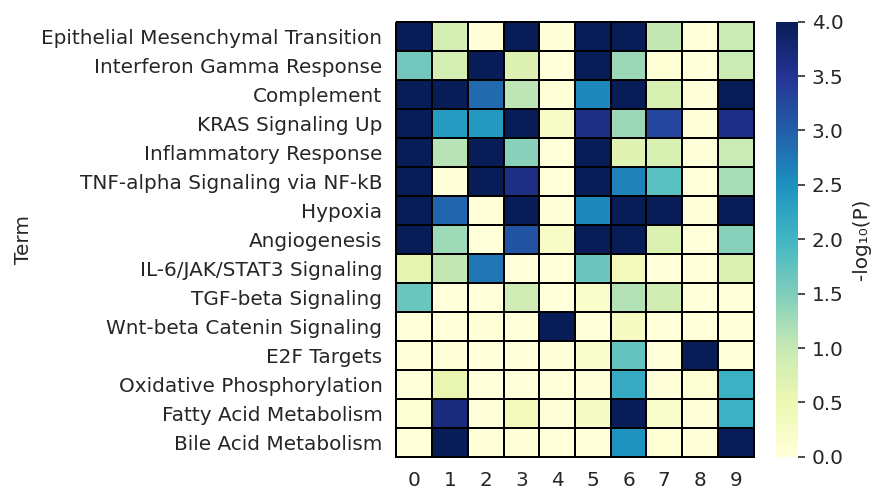

In [27]:
import seaborn as sns
plt.figure(figsize = (4,4))
#sns.heatmap(minuslogp.loc[GOtoplot, order_cat], vmax=4, cmap="viridis"
with sns.axes_style("white"):
    sns.heatmap(minuslogp[~minuslogp_bool].loc[GO2plot,:],vmax=4, cmap="YlGnBu", linewidths=1, linecolor='black',
                clip_on=False,cbar_kws={'label': u'-log\u2081\u2080(P)'}) # vmax =4
    plt.savefig(
    f"{FIG2SAVE}/GSEA_regions_{SAMPLE_NAME}_heatmap_no_ordering.pdf",
    dpi=DPI,
    bbox_inches="tight",
    facecolor='white')
    
    plt.show()

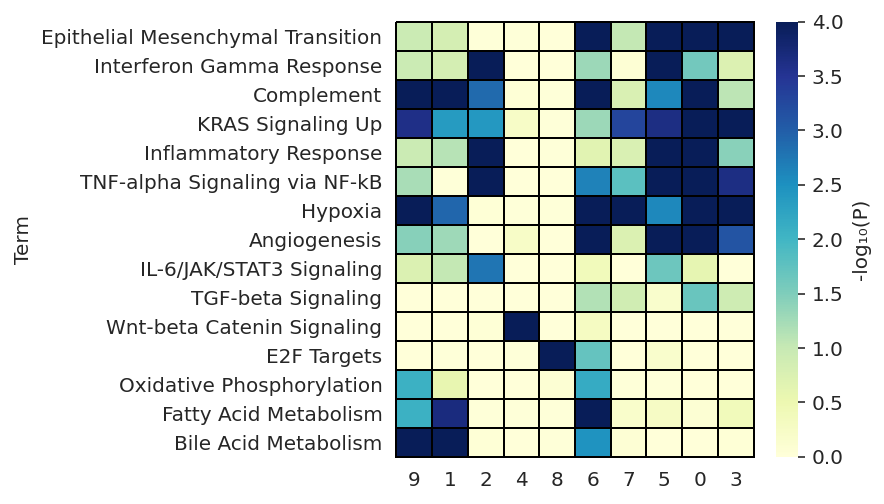

In [28]:
import seaborn as sns
plt.figure(figsize = (4,4))
order_neighbourhoods = ["9", "1", "2", "4", "8", "6", "7", "5", "0", "3"]
#sns.heatmap(minuslogp.loc[GOtoplot, order_cat], vmax=4, cmap="viridis"
with sns.axes_style("white"):
    sns.heatmap(minuslogp[~minuslogp_bool].loc[GO2plot,order_neighbourhoods],
                vmax=4, cmap="YlGnBu", 
                linewidths=1, 
                linecolor='black',
                clip_on=False,cbar_kws={'label': u'-log\u2081\u2080(P)'}) # vmax =4
    plt.savefig(
    f"{FIG2SAVE}/GSEA_regions_{SAMPLE_NAME}_heatmap_ordered.pdf",
    dpi=DPI,
    bbox_inches="tight",
    facecolor='white')
    
    plt.show()

In [29]:
df_2plot = minuslogp[~minuslogp_bool].loc[GO2plot,:].copy()
df_2plot

,0,1,2,3,4,5,6,7,8,9
Term,,,,,,,,,,
Epithelial Mesenchymal Transition,78.826097,0.831933,0.021333,33.675835,0.021333,13.041433,33.616521,1.022821,0.000000,0.952826
Interferon Gamma Response,1.604093,0.831933,9.356309,0.731986,0.000000,10.336790,1.304966,0.076575,0.000000,0.952826
Complement,6.613027,7.034111,2.876700,1.063250,0.031535,2.590609,10.614604,0.777186,0.021333,7.119740
KRAS Signaling Up,10.222846,2.363008,2.398723,6.290278,0.230860,3.631874,1.304966,3.296082,0.021333,3.597112
Inflammatory Response,9.610343,1.117197,6.137145,1.431106,0.000000,4.870708,0.657476,0.777186,0.021333,0.952826
TNF-alpha Signaling via NF-kB,6.613027,0.021333,5.483901,3.626545,0.000000,6.152939,2.646357,1.791295,0.000000,1.209908
Hypoxia,5.914025,2.907931,0.046787,4.196877,0.021333,2.590609,12.340782,4.388788,0.021333,7.119740
Angiogenesis,9.156600,1.293411,0.000000,3.110518,0.230860,5.083927,10.614604,0.745646,0.000000,1.445179
IL-6/JAK/STAT3 Signaling,0.597670,1.028023,2.777187,0.000000,0.000000,1.648546,0.375981,0.000000,0.000000,0.746609


### to try clustering neighoourhoods

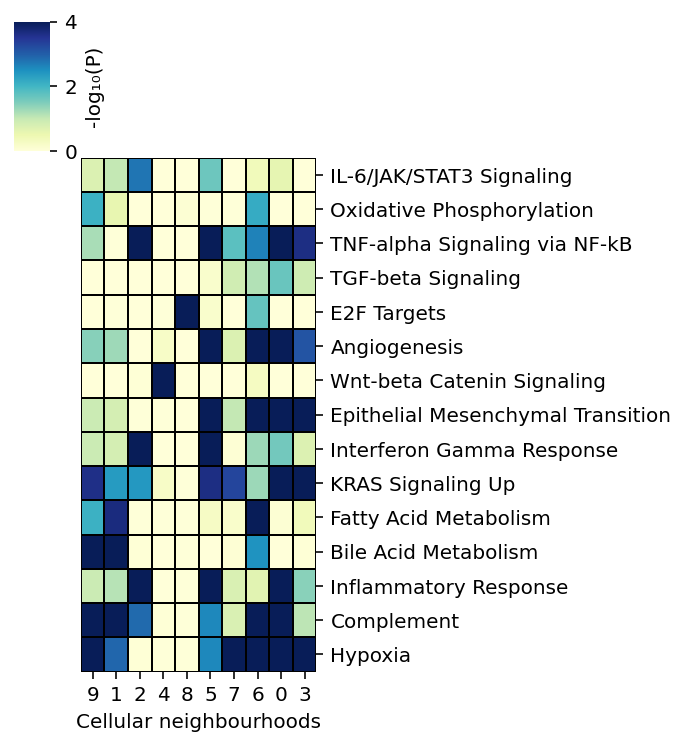

In [30]:
import matplotlib.pyplot as plt
import scipy.spatial as sp, scipy.cluster.hierarchy as hc
row_linkage, col_linkage = (hc.linkage(sp.distance.pdist(x, metric="jaccard"), method="average")
  for x in (df_2plot.values, df_2plot.values.T))

import seaborn as sns

g = sns.clustermap(df_2plot, row_linkage=row_linkage, col_linkage=col_linkage, vmin=0,vmax=4, figsize=(5,5),
                 cmap="YlGnBu", linecolor='black', linewidths=1, cbar_kws={'label': u'-log\u2081\u2080(P)'})
#g.ax_cbar.set_position((0.15, 0.85, .03, .1))
g.ax_heatmap.set_xlabel("Cellular neighbourhoods")
g.ax_heatmap.set_ylabel("")
g.ax_row_dendrogram.set_visible(False)
g.ax_col_dendrogram.set_visible(False)

In [31]:
FIG2SAVE

PosixPath('/data/BCI-CRC/nasrine/data/CRC/spatial/CRC_LM_VISIUM/CRC_LM_VISIUM_04_08_09_11/cell2loc_spatialde2/concat_withWu2022/microenvs_geneexp/figures')